In [3]:
#TF-IDF : Corpus debats : 
import os 
import pandas as pd

from tqdm import tqdm

import re

from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Word Frequencies and TF - IDF / LAtin based document OCRed with Pytesseract (to be improved)
path ="C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted"

dict_textes = {}
liste = []
for file in tqdm(os.listdir(path)):
    if file.endswith('.txt'):
        chemin_fichier = os.path.join(path,file)
        with open(chemin_fichier, "r",encoding="utf-8") as doc_debat : 
            texte_debat_ocr = doc_debat.read().lower().split()
            file_name  =  os.path.basename(chemin_fichier) 
            dict_textes[file_name] = texte_debat_ocr
            
            for mot in texte_debat_ocr:
                liste.append(mot)
        

print(len(liste))

100%|██████████| 7461/7461 [14:31<00:00,  8.56it/s]  


278034833


In [5]:
with open("C:/Users/portable_laura/Downloads/stop_words_french.txt", 'r', encoding='utf-8') as doc:
    stop = doc.read().split()

In [6]:
def clean_dico(dico=dict(), stop=None):
    if stop is None:
        stop = set()
    else:
        stop = set(stop)

    regex = re.compile(r'\W+')
    dico_clean = {}

    for auteur, texte in tqdm(dico.items()):
        texte_provisoire = [
            regex.sub('', mot).lower()
            for mot in texte
            if mot not in stop and len(mot) > 3 and regex.sub('', mot).isalpha()
        ]
        dico_clean[auteur] = texte_provisoire

    return dico_clean


In [4]:
def clean_dico(dico = dict()):

    dico_clean = {}
    for auteur, texte in tqdm(dico.items()):
        texte_provisoire = []
        for mot in texte:
            if mot not in stop and len(mot)>3:
                mot = re.sub(r'\W+', '', mot)  
                if mot.isalpha():             
                    texte_provisoire.append(mot.lower()) 
        dico_clean[auteur] = texte_provisoire

    return dico_clean

    
    

In [7]:
dico_corpus = clean_dico(dict_textes,stop)

100%|██████████| 7461/7461 [45:56<00:00,  2.71it/s]     


In [ ]:
vocabulaire = ["freycinet", "halage", "péniche","tirant",'batellerie', 'navigable', "écluse",'bateau', "bateaux", "transport", 'fluvial', "fleuve", "rivière", "navigation", "navigabilité", "affluent", "houille", "eau", "inondation", "barrage", "canal","loire", "oise", "garonne", "rhin", "rhône", "seine",
"bassin", "versant", "flux", "ascenseur", "midi", "embarcation",
"port", "quai", "marchandise", "irrigation", "adduction", "drainage", "canalisée", "chantier", "mouillage", "convoi", 
"Dordogne",
"train", "trains", "rails", "rail", "ferrée",  "chemin de fer"]






liste_navig =["freycinet", "gabarit", "Tardieu",
              "halage", "curage", "dragage", "transbordement", "cabotage",
              "irrigation", "adduction", "drainage", "canalisée", "mouillage", "canalisation"
              "péniche",  'bateau', "bateaux", "gabare", "allège", "convoi", "automoteur", "chaland", 
              'remorqueur', "bac", "fret", "tonnage",
              "tirant","écluse", 'fluvial', "fleuve", "rivière", "affluent","riviere", "canal", "canaux",
              "bassin", "versant", "flux",
              'batellerie', 'navigable',"navigation", "navigabilité", "pilotage",
              "transport", "houille",  "marchandise", 
              "eau", "inondation", "barrage",  "chantier",
              "loire", "oise", "garonne", "rhin", "rhône", "seine", "midi","marne",
              "ascenseur", "embarcation", "port", "quai",
              "ponts", "chaussees"

              ]

liste_polit = ["travaux", "publics", "finances", "credit", "dotation", "budget", "dépense","tresor","utilite",
               "amenagement","infrastructure","concession","maitrise","ouvrage","questeur","trésorier","compagnie"]

liste_ferrov = ["train", "trains", "rail", "chemin", "chemins", "fer", "chemin de fer", "voie", "voies", "ferré", "ferrée", "ferrés", "ferrées",
                "Acier", "Ballast", "Gare", "depot", "Chauffeur", "controleur", "cheminot", "cheminots",
                "Autorail", "rame", "locomotive", "electrique","vapeur",
                "voiture", "wagons",
                "compartiment", "compartiments", "express", "omnibus",
                "marchandises"]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from datetime import datetime

i=1
print(f"Etape {i}/7 : Définition corpus")
corpus = [" ".join(mots) for mots in tqdm(dico_corpus.values())]
i+=1
print(f"Etape {i}/7 : Définition titres")
titres_str = [titre.replace(".txt", "") for titre in dico_corpus.keys()]
titres = pd.to_datetime(titres_str, format="%Y-%m-%d", errors="coerce")

i+=1
print(f"Etape {i}/7 : Vectorization")
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5)
tfidf_matrix = vectorizer.fit_transform(corpus)

i+=1
print(f"Etape {i}/7 : Creation Matrice")
df_tf_idf = pd.DataFrame.sparse.from_spmatrix(
    tfidf_matrix, 
    index=titres, 
    columns=vectorizer.get_feature_names_out()
)

i+=1
print(f"Etape {i}/7 : Conservation des top terms et docs, création petite matrice")
top_terms = df_tf_idf.sum().sort_values(ascending=False).head(50).index

top_docs = df_tf_idf.sum(axis=1).sort_values(ascending=False).head(50).index

df_small = df_tf_idf.loc[top_docs, top_terms]


i+=1
print(f"Etape {i}/7 : Impression Matrice")
plt.figure(figsize=(14, 10))
sns.heatmap(df_small, cmap="coolwarm", cbar=True, xticklabels=True, yticklabels=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Matrice TF-IDF (Top 50 termes × Top 50 documents par date)")
plt.xlabel("Termes")
plt.ylabel("Documents (date)")
plt.tight_layout()
plt.show()


i+=1
print(f"Etape {i}/7 : Terminé")

Etape 1/7 : Définition corpus


100%|██████████| 4509/4509 [00:34<00:00, 131.50it/s]


Etape 2/7 : Définition titres
Etape 3/7 : Vectorization
Etape 4/7 : Creation Matrice


Étape 1/7 : Définition corpus


100%|██████████| 7461/7461 [10:19<00:00, 12.04it/s]  


Étape 2/7 : Définition titres
Étape 3/7 : Vectorization


c:\Users\portable_laura\anaconda3\envs\python_avance\lib\site-packages\sklearn\feature_extraction\text.py:1381: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Étape 4/7 : Sélection top termes et documents
Étape 5/7 : Création petite matrice DataFrame
Étape 6/7 : Affichage matrice


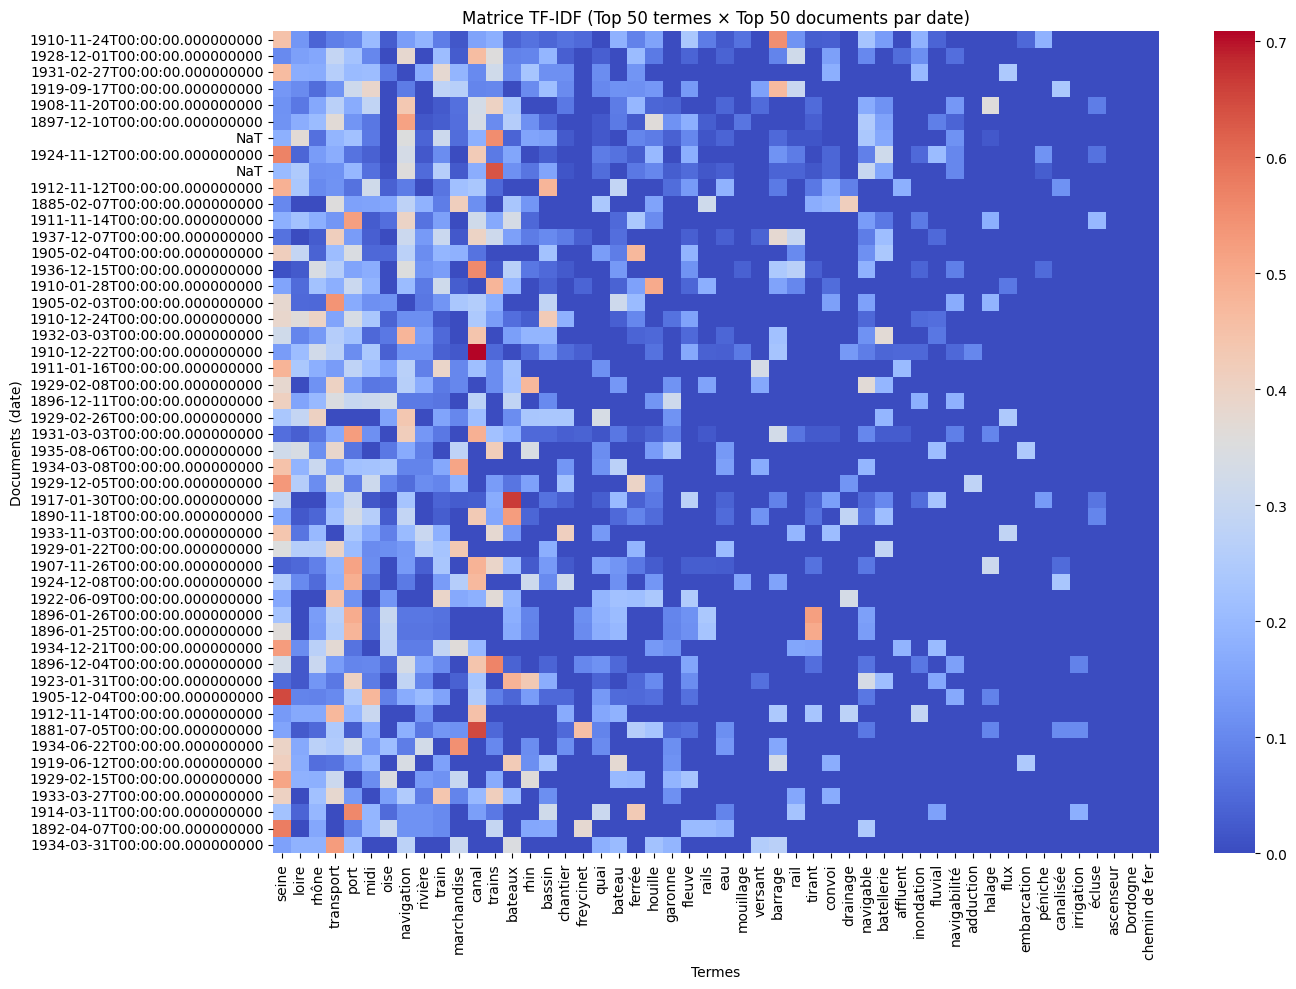

Étape 7/7 : Terminé


In [27]:
# Bonne version 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from datetime import datetime

i = 1
print(f"Étape {i}/7 : Définition corpus")
corpus = [" ".join(mots) for mots in tqdm(dico_corpus.values())]

i += 1
print(f"Étape {i}/7 : Définition titres")
titres_str = [titre.replace(".txt", "") for titre in dico_corpus.keys()]
titres = pd.to_datetime(titres_str, format="%Y-%m-%d", errors="coerce")

i += 1
print(f"Étape {i}/7 : Vectorization")
#vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, max_features=10000)


vectorizer = TfidfVectorizer(vocabulary=vocabulaire)

tfidf_matrix = vectorizer.fit_transform(corpus)

i += 1
print(f"Étape {i}/7 : Sélection top termes et documents")
term_sums = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
top_term_indices = term_sums.argsort()[::-1][:50]
top_terms = np.array(vectorizer.get_feature_names_out())[top_term_indices]

tfidf_small_terms = tfidf_matrix[:, top_term_indices]

doc_sums = np.asarray(tfidf_small_terms.sum(axis=1)).flatten()
top_n = min(50, len(vocabulaire))
top_doc_indices = doc_sums.argsort()[::-1][:top_n]
titres_small = np.array(titres)[top_doc_indices]

tfidf_small_final = tfidf_small_terms[top_doc_indices, :]

i += 1
print(f"Étape {i}/7 : Création petite matrice DataFrame")
df_small = pd.DataFrame.sparse.from_spmatrix(
    tfidf_small_final,
    index=titres_small,
    columns=top_terms
)

i += 1
print(f"Étape {i}/7 : Affichage matrice")
plt.figure(figsize=(14, 10))
sns.heatmap(df_small, cmap="coolwarm", cbar=True, xticklabels=True, yticklabels=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Matrice TF-IDF (Top 50 termes × Top 50 documents par date)")
plt.xlabel("Termes")
plt.ylabel("Documents (date)")
plt.tight_layout()
plt.show()

i += 1
print(f"Étape {i}/7 : Terminé")


In [ ]:
i=1
print(f"Etape {i}/4 : Corpus + Titres")
corpus = [" ".join(mots) for mots in tqdm(dico_corpus.values())]
titres = list(dico_corpus.keys())

i+=1
print(f"Etape {i}/4 : Vectorizer")
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
df_tf_idf = pd.DataFrame(tfidf_matrix.toarray(), index=titres, columns=vectorizer.get_feature_names_out())


df_tf_idf

i+=1
print(f"Etape {i}/4 : Top valeurs et features")
top_features = df_tf_idf.sum().sort_values(ascending=False).head(100).index
df_small = df_tf_idf[top_features].head(200)

i+=1
print(f"Etape {i}/4 : Impression matrice")
plt.figure(figsize=(12, 8))
sns.heatmap(df_small, cmap="coolwarm", cbar=True, xticklabels=10, yticklabels=10)
plt.title("Matrice TF-IDF (top 50 termes)")
plt.xlabel("Termes")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()

100%|██████████| 4509/4509 [00:52<00:00, 85.74it/s] 


===

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from nltk.corpus import stopwords
import nltk
from tqdm import tqdm
from datetime import datetime

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\portable_laura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Étape 1/9 : Construction du corpus...


100%|██████████| 7461/7461 [05:21<00:00, 23.20it/s]  


Étape 2/9 : Conversion des titres de documents (dates)...
Étape 3/9 : Chargement des stopwords français...
Étape 4/9 : Vectorisation TF-IDF...
Étape 5/9 : Réduction de dimension avec TruncatedSVD...
Étape 6/9 : Clustering KMeans (k=5)...


c:\Users\portable_laura\anaconda3\envs\python_avance\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Étape 7/9 : Création du DataFrame de résultats...
Étape 8/9 : Affichage de la projection 2D...


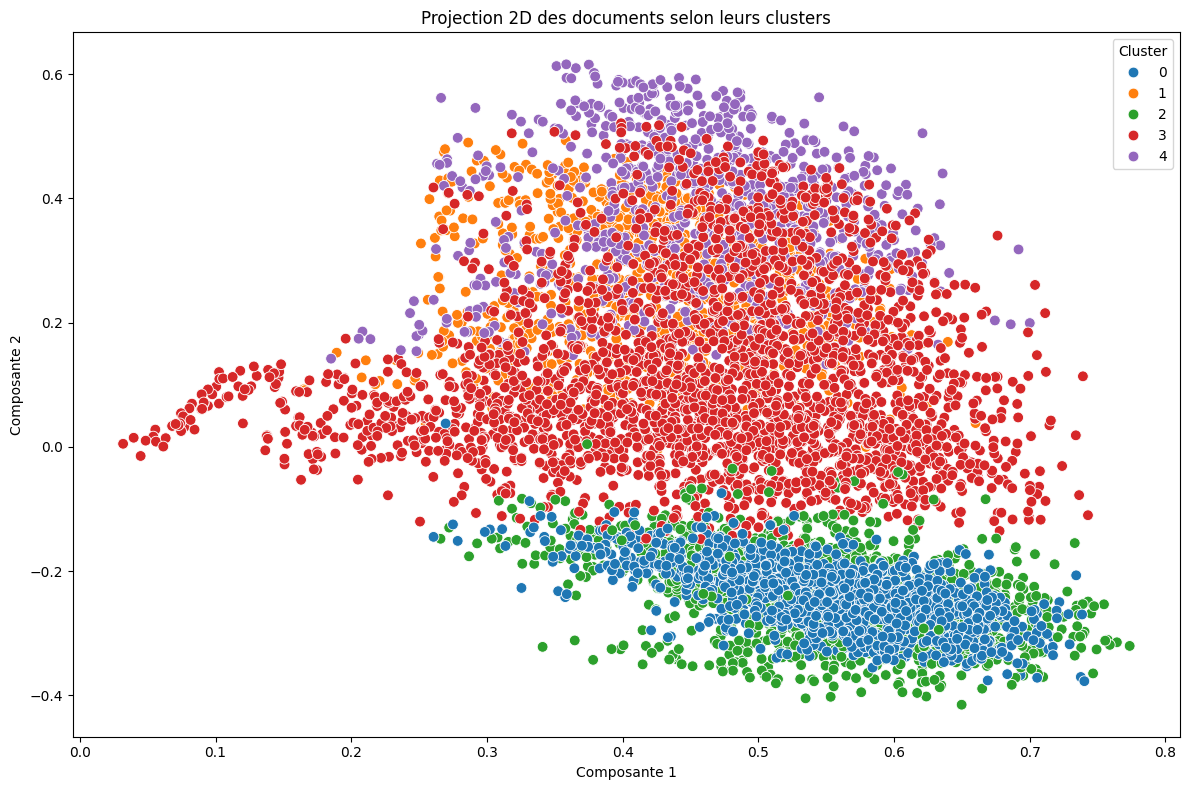

Étape 9/9 : Affichage des documents par cluster...

=== Cluster 0 (nombre de documents : 1156) ===
- 1921-01-18.txt : sommaire procèlverbal eycuses congés constitution bureau sénat règlement lordre jour présidence raoul péret séance ouverte heures aumomentoùltfle prés...
- 1921-04-08.txt : affaires etrangeres ballet député demandeàm ministre affaires étrangères ilyliitenjuillet ministère dcmlloyes ordres grades administrationsceiitrilosd...
- 1921-05-15.txt : ghambreide session ordinaire reponsesdesministres questions écritesj difficulté semble jusquici sêtre produiteàcet égard registre spécial visé cidessu...
- 1921-07-21.txt : législature session ordinaire réponsesdes ministres questions écrites affairésetrangereslenumconnetdéputé demandéàulliessîfirsdesaffairesétrangères da...
- 1921-07-24.txt : chambredesdéputés législature session ordinaire réponsesdes ministres questions écrites leroitsdeesffairsétrangèresquels lescwltsdesrranoaisporteursde...

=== Cluster 1 (nombre de documents 

In [9]:


print("Étape 1/9 : Construction du corpus...")
corpus = [" ".join(mots) for mots in tqdm(dico_corpus.values())]

print("Étape 2/9 : Conversion des titres de documents (dates)...")
titres = list(dico_corpus.keys())

print("Étape 3/9 : Chargement des stopwords français...")
stop_fr = stopwords.words('french')

print("Étape 4/9 : Vectorisation TF-IDF...")
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words=stop_fr)
X_tfidf = vectorizer.fit_transform(corpus)

print("Étape 5/9 : Réduction de dimension avec TruncatedSVD...")
svd = TruncatedSVD(n_components=100, random_state=42)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_reduced = lsa.fit_transform(X_tfidf)

print("Étape 6/9 : Clustering KMeans (k=5)...")
k = 5
km = KMeans(n_clusters=k, random_state=42)
km.fit(X_reduced)
clusters = km.labels_

print("Étape 7/9 : Création du DataFrame de résultats...")
df_clusters = pd.DataFrame({
    'Titre': titres,
    'Cluster': clusters,
    'Texte': corpus
})

print("Étape 8/9 : Affichage de la projection 2D...")
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=clusters, palette='tab10', s=60)
plt.title("Projection 2D des documents selon leurs clusters")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

print("Étape 9/9 : Affichage des documents par cluster...")
for i in range(k):
    print(f"\n=== Cluster {i} (nombre de documents : {(clusters == i).sum()}) ===")
    exemples = df_clusters[df_clusters['Cluster'] == i].head(5)
    for idx, row in exemples.iterrows():
        print(f"- {row['Titre']} : {row['Texte'][:150]}...")


===


In [23]:
df_tf_idf_copie = tfidf_matrix.copy()  
try:
    df_tf_idf_copie['date'] = pd.to_datetime(df_tf_idf_copie.index)
except Exception as e:
    print("Erreur de conversion des titres en dates :", e)

df_tf_idf_copie = pd.DataFrame(tfidf_matrix.toarray(), columns=vocabulaire)
df_tf_idf_copie.set_index('date', inplace=True)
df_tf_idf_copie.set_index('date', inplace=True)
df_grouped = df_tf_idf_copie.resample('M').sum()  

df_grouped_top_terms = df_grouped[top_terms]

plt.figure(figsize=(14, 8))

top10 = df_grouped_top_terms.sum().sort_values(ascending=False).head(10).index
df_grouped_top_terms[top10].plot(figsize=(14, 8), linewidth=2)

plt.title("Évolution temporelle des 10 termes les plus significatifs")
plt.xlabel("Date")
plt.ylabel("Poids TF-IDF agrégé")
plt.legend(title="Termes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Erreur de conversion des titres en dates : index not found


KeyError: "None of ['date'] are in the columns"

In [21]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vocabulaire)
tfidf_df = tfidf_df.sort_values(by=tfidf_df.columns[4], ascending=False)
tfidf_df

,batellerie,navigable,bateau,eau,inondation
1496,0.000000,0.000000,0.0,0.0,1.0
4359,0.000000,0.000000,0.0,0.0,1.0
4242,0.000000,0.000000,0.0,0.0,1.0
6543,0.000000,0.000000,0.0,0.0,1.0
495,0.000000,0.000000,0.0,0.0,1.0
...,...,...,...,...,...
2518,0.000000,0.000000,0.0,0.0,0.0
2517,0.130011,0.991513,0.0,0.0,0.0
2516,0.000000,0.000000,0.0,0.0,0.0
2515,0.000000,0.000000,0.0,0.0,0.0


In [10]:
df_tf_idf_copie

<4509x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 12255392 stored elements in Compressed Sparse Row format>